In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [6]:
file = pd.read_csv('D:\mipt\project\data and masks\input images\\temp\\temp.csv')
file.head()

,File Name,Value 1,Value 2,Value 3,Value 4,Value 5,Value 6,Value 7,Value 8,Value 9,Value 10,Value 11,Value 12,Value 13,Value 14
0,212,480,640,48,311,44,406,275,433,279,384,341,390,343,336
1,213,640,480,59,234,36,348,131,344,134,300,180,293,184,212
2,214,480,640,62,409,55,566,269,562,267,513,364,509,357,406
3,215,480,640,238,575,313,575,319,405,280,404,282,357,236,358
4,216,480,640,60,174,45,291,130,308,135,267,179,273,189,194


In [8]:
import os 
st = 'File Name'
saving_dir = 'D:\mipt\project\data and masks\input images\\temp\\'
for i in range(len(file)):
    width, height = file['Value 1'][i], file['Value 2'][i]
    black_image = np.full((height, width), 0, dtype=np.uint8)
    points = [
    (file['Value 3'][i], file['Value 4'][i]),
    (file['Value 5'][i], file['Value 6'][i]),
    (file['Value 7'][i], file['Value 8'][i]),
    (file['Value 9'][i], file['Value 10'][i]),
    (file['Value 11'][i], file['Value 12'][i]),
    (file['Value 13'][i], file['Value 14'][i])
    ]
    polygon = [np.array(points)]
    cv2.fillPoly(black_image, polygon, color=255)
    mask_path = saving_dir + f'{file[st][i]}m.PNG'
    cv2.imwrite(mask_path ,black_image)

    

{0: 5066965, 255: 397635}

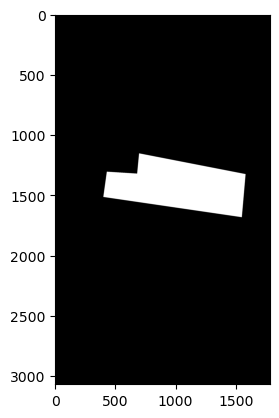

In [61]:
mask = cv2.imread('D:\mipt\project\data and masks\masks\Ready\\2m.PNG',0)
plt.imshow(mask, cmap='gray')
unique, counts = np.unique(mask, return_counts=True)
dict(zip(unique, counts))

[[1308, 429], [1517, 400], [1685, 1546], [1328, 1577], [1156, 698], [1324, 679]]


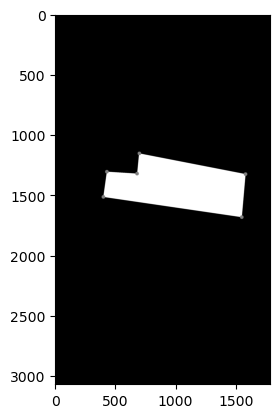

In [62]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
vertex_image = mask.copy()
contours_coordinates = []

for contour in contours:
    epsilon = 0.03 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    for point in approx:
        x, y = point[0]
        contours_coordinates.append([y,x])
        cv2.circle(vertex_image, (x, y), 15, 128, -1)

plt.imshow(vertex_image, cmap='gray')

print(contours_coordinates)
